### A CNN for MNIST data, with changes of parameters, using CUDA GPU to train

In [1]:
from mnist_reader_sub import load_mnist_sub

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

from sklearn.model_selection import train_test_split

### Q1 MNIST

In [17]:
x_train = idx2numpy.convert_from_file('mnist/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('mnist/train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('mnist/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('mnist/t10k-labels.idx1-ubyte')

x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_data = TensorDataset(torch.from_numpy(x_train).float().to(device), torch.from_numpy(y_train).long().to(device))
test_data = TensorDataset(torch.from_numpy(x_test).float().to(device), torch.from_numpy(y_test).long().to(device))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [25]:
class net1(nn.Module):
    def __init__(self):
        super(net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

After 1 epoch, loss is 0.04574085772037506
After 2 epoch, loss is 0.029627691954374313
After 3 epoch, loss is 0.006293443497270346
After 4 epoch, loss is 0.009524019435048103
After 5 epoch, loss is 0.014465762302279472
After 6 epoch, loss is 0.018819525837898254
After 7 epoch, loss is 0.06189886853098869
After 8 epoch, loss is 0.06020088121294975
After 9 epoch, loss is 0.02031881734728813
After 10 epoch, loss is 0.19530221819877625


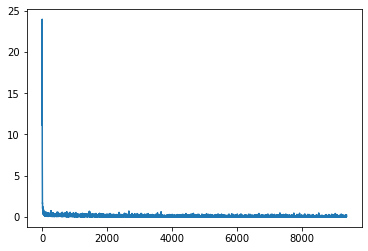

In [28]:
model1 = net1().to(device)

epochs = 10

optimizer = optim.Adam(model1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

l = []

for i in range(epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model1(x)
        loss1 = criterion(y_pred, y)
        loss1.backward()
        optimizer.step()
        l.append(loss1.item())
    print('After {} epoch, loss is {}'.format(i+1, loss1.item()))

plt.plot(l)


In [29]:
model1.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for x, y in test_loader:
        y_pred = model1(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Accuracy of the model on the test images: 98.88 %


### Q2 Fashion-MNIST

In [ ]:
x_train, y_train = load_mnist_sub('fashion_sub', kind='train_sub')
x_test, y_test = load_mnist_sub('fashion_sub', kind='test_sub')

x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_data = TensorDataset(torch.from_numpy(x_train).float().to(device), torch.from_numpy(y_train).long().to(device))
test_data = TensorDataset(torch.from_numpy(x_test).float().to(device), torch.from_numpy(y_test).long().to(device))

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

In [31]:
class net2(nn.Module):
    def __init__(self):
        super(net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

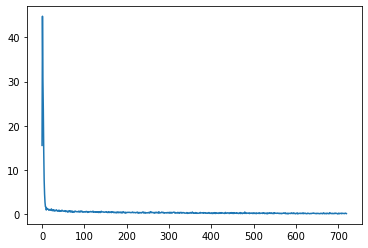

In [67]:
model2 = net2().to(device)

epochs = 30

optimizer = optim.Adam(model2.parameters(), lr=0.001, weight_decay=0.0001)
criterion = nn.CrossEntropyLoss()

l = []

for i in range(epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model2(x)
        loss2 = criterion(y_pred, y)
        loss2.backward()
        optimizer.step()
        l.append(loss2.item())

plt.plot(l)

In [68]:
model2.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for x, y in test_loader:
        y_pred = model2(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

    print('Accuracy of the model on the test images: {:.2f} %'.format(100 * correct / total))

Accuracy of the model on the test images: 77.89 %


### Q3 Fashion-MNIST Changing Parameters

In [5]:
# change CNN parameters

class net3(nn.Module):
    def __init__(self):
        super(net3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(9216, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        output = F.log_softmax(x, dim=1)
        return output

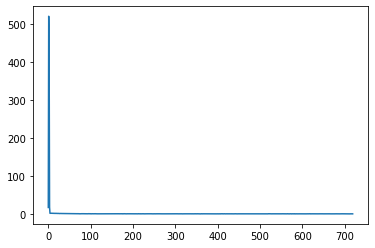

In [6]:
model3 = net3().to(device)

epochs = 30

optimizer = optim.Adam(model3.parameters(), lr=0.01, weight_decay=0.0001)
criterion = nn.CrossEntropyLoss()

l = []

for i in range(epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model3(x)
        loss3 = criterion(y_pred, y)
        loss3.backward()
        optimizer.step()
        l.append(loss3.item())

plt.plot(l)

In [7]:
model3.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for x, y in test_loader:
        y_pred = model3(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

    print('Accuracy of the model on the test images: {:.2f} %'.format(100 * correct / total))

Accuracy of the model on the test images: 66.52 %


### Q4 delete fc layer

In [8]:
class net4(nn.Module):
    def __init__(self):
        super(net4, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = F.relu(x)
        x = self.dropout2(x)
        output = F.log_softmax(x, dim=1)
        return output

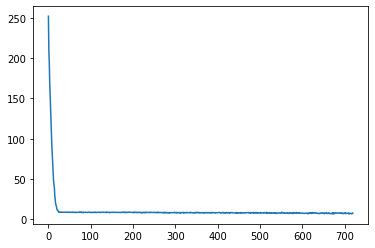

In [9]:
model4 = net4().to(device)

epochs = 30

optimizer = optim.Adam(model4.parameters(), lr=0.001, weight_decay=0.0001)
criterion = nn.CrossEntropyLoss()

l = []

for i in range(epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model4(x)
        loss4 = criterion(y_pred, y)
        loss4.backward()
        optimizer.step()
        l.append(loss4.item())

plt.plot(l)

In [10]:
model4.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for x, y in test_loader:
        y_pred = model4(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

    print('Accuracy of the model on the test images: {:.2f} %'.format(100 * correct / total))

Accuracy of the model on the test images: 33.04 %


### Q5 delete pooling layer

In [10]:
# no pooling

class net5(nn.Module):
    def __init__(self):
        super(net5, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(36864, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

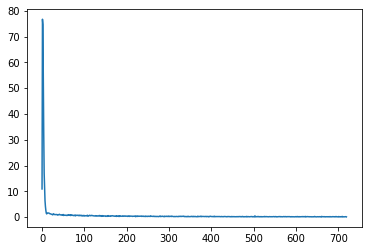

In [11]:
model5 = net5().to(device)

epochs = 30

optimizer = optim.Adam(model5.parameters(), lr=0.001, weight_decay=0.0001)
criterion = nn.CrossEntropyLoss()

l = []

for i in range(epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model5(x)
        loss5 = criterion(y_pred, y)
        loss5.backward()
        optimizer.step()
        l.append(loss5.item())

plt.plot(l)

In [12]:
model5.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for x, y in test_loader:
        y_pred = model5(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

    print('Accuracy of the model on the test images: {:.2f} %'.format(100 * correct / total))

Accuracy of the model on the test images: 78.23 %
